In [107]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model
import numpy as np

%matplotlib inline

In [374]:
df = pd.read_pickle("../ml_finalproj_train_vF.pkl")

In [133]:
feature_list = df.columns[df.columns.str.startswith("x")].tolist()

Index(['x22', 'x42', 'x16', 'x17', 'x30', 'x39', 'x37', 'x2', 'x6', 'x0',
       'x46', 'x61', 'x65', 'x53', 'x5', 'x63', 'x49', 'x21', 'x25', 'x13',
       'x28', 'x66', 'x51', 'x9', 'x64', 'x62', 'x29'],
      dtype='object')

In [375]:
df_insample = df[df.timestamp < 166]
df_outsample = df[df.timestamp > 166]

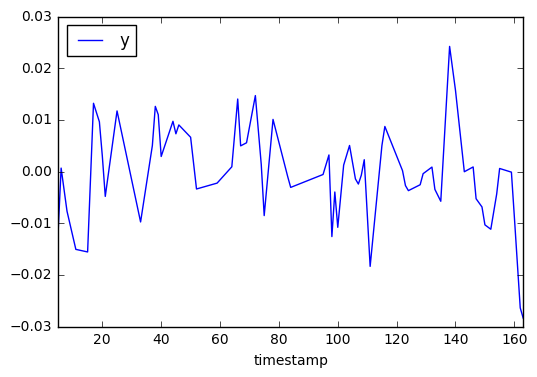

In [22]:
df_insample[df_insample.id == 40][["timestamp","y"]].plot(x = "timestamp", y = "y")

In [85]:
df_working = df_outsample.copy()

In [81]:
df_working = df_insample.copy()

In [77]:
df_working.describe()

,timestamp,id,x22,x42,x16,x17,x30,x39,x37,x2,...,x13,x28,x66,x51,x9,x64,x62,x29,weight,y
count,44135.000000,44135.000000,44135.000000,44135.000000,4.413500e+04,4.413500e+04,44135.000000,44135.000000,44135.000000,44135.000000,...,44135.000000,44135.000000,44135.000000,44135.000000,4.413500e+04,44135.000000,44135.000000,44135.000000,4.413500e+04,44135.000000
mean,82.623473,323.319882,-0.000003,4.498108,3.512424e-06,-6.721609e-07,3.807341,0.000006,0.000001,5.052249,...,1.800702,1.813549,-0.008075,2.504837,9.153558e-07,-0.005348,-0.000689,2.127201,3.104329e+06,-0.000073
std,47.903880,191.706106,0.000655,3.784940,8.419055e-04,6.549463e-04,3.729091,0.000624,0.000622,3.087006,...,0.399477,0.389474,4.996776,2.546441,8.456362e-04,3.002021,1.005014,0.983527,1.902060e+06,0.016135
min,0.000000,0.000000,-0.003192,1.000000,-8.116479e-03,-3.281650e-03,1.000000,-0.002865,-0.002905,1.000000,...,1.000000,1.000000,-22.333184,1.000000,-8.177779e-03,-12.793774,-4.244120,1.000000,5.127866e+05,-0.082717
25%,41.000000,157.000000,-0.000388,1.000000,-3.828981e-04,-3.803217e-04,1.000000,-0.000355,-0.000357,2.000000,...,2.000000,2.000000,-3.356866,1.000000,-3.882574e-04,-2.049912,-0.680811,1.000000,1.774634e+06,-0.009432
50%,82.000000,320.000000,-0.000007,3.000000,8.302549e-07,-7.831674e-06,1.000000,-0.000011,-0.000011,5.000000,...,2.000000,2.000000,-0.013574,1.000000,-3.033947e-06,0.002264,0.000954,3.000000,2.573607e+06,-0.000136
75%,124.000000,492.000000,0.000370,8.000000,3.884156e-04,3.762513e-04,7.000000,0.000347,0.000342,8.000000,...,2.000000,2.000000,3.356017,3.000000,3.873574e-04,2.017805,0.675297,3.000000,3.912370e+06,0.009280
max,165.000000,667.000000,0.002945,11.000000,9.132773e-03,3.254314e-03,11.000000,0.003281,0.003300,10.000000,...,2.000000,2.000000,20.442915,11.000000,8.899556e-03,11.647167,4.352995,3.000000,3.735186e+07,0.078158


#### Feature 13 28, takes value in 1, 2

In [30]:
df_working.x28.unique()
df_working.x13.unique()

array([2, 1], dtype=int64)

In [35]:
df_insample[df_insample.x13 == df_insample.x28].shape

(27110, 31)

In [36]:
df_insample[df_insample.x13 != df_insample.x28].shape

(17025, 31)

In [37]:
df_insample[df_insample.x13 == 1].shape

(8796, 31)

In [38]:
df_insample[df_insample.x13 == 2].shape

(35339, 31)

In [40]:
df_insample[df_insample.x28 == 2].shape
df_insample[df_insample.x28 == 1].shape

(8229, 31)

#### correlation

In [86]:
cor_with_y = df_working[df_working.columns[df_working.columns.str.startswith("x")].tolist()+["y"]].corr()['y'].sort_values()

In [88]:
df_working[df_working.columns[df_working.columns.str.startswith("x")].tolist()+["y"]].corr()

,x22,x42,x16,x17,x30,x39,x37,x2,x6,x0,...,x25,x13,x28,x66,x51,x9,x64,x62,x29,y
x22,1.000000,-0.046978,0.006298,0.034200,0.045484,-0.014224,-0.015043,-0.003676,-0.000653,-0.000921,...,-0.036735,0.004026,0.000670,-0.005227,0.042405,0.008131,0.000213,-0.002843,-0.057262,0.028473
x42,-0.046978,1.000000,-0.207488,-0.034982,-0.643876,0.005812,0.017878,0.017479,0.001468,-0.449898,...,0.149298,-0.004238,-0.000653,-0.003267,-0.544584,-0.197286,0.002150,0.000758,0.803606,-0.005593
x16,0.006298,-0.207488,1.000000,-0.004260,0.209943,0.003154,-0.000241,-0.000876,-0.003695,-0.055219,...,-0.004840,-0.005013,0.000052,0.001310,0.008395,0.005144,-0.001338,-0.000204,-0.158444,0.002807
x17,0.034200,-0.034982,-0.004260,1.000000,0.038681,-0.015164,-0.027026,-0.003402,-0.005971,-0.007562,...,-0.049632,0.002192,0.001855,0.008606,0.043649,0.000409,0.002734,0.004707,-0.055154,0.020172
x30,0.045484,-0.643876,0.209943,0.038681,1.000000,-0.008793,-0.019206,-0.029378,0.017057,0.450751,...,-0.541656,-0.006133,0.002248,-0.002009,0.192997,0.200817,-0.000137,-0.000532,-0.817920,0.002427
x39,-0.014224,0.005812,0.003154,-0.015164,-0.008793,1.000000,0.032806,-0.001654,0.008709,-0.003638,...,0.074294,-0.002013,-0.008417,0.001641,-0.074130,-0.017586,-0.001304,0.002904,0.049152,0.001748
x37,-0.015043,0.017878,-0.000241,-0.027026,-0.019206,0.032806,1.000000,0.003717,0.009344,-0.001352,...,0.012169,0.002398,0.000685,0.001295,-0.011006,-0.003785,-0.003942,0.002502,0.020866,-0.007635
x2,-0.003676,0.017479,-0.000876,-0.003402,-0.029378,-0.001654,0.003717,1.000000,0.040276,-0.000319,...,0.033491,-0.048791,0.283334,-0.001612,-0.013380,-0.002613,0.003384,0.002453,0.031589,-0.003014
x6,-0.000653,0.001468,-0.003695,-0.005971,0.017057,0.008709,0.009344,0.040276,1.000000,0.004319,...,-0.009599,-0.006120,0.000571,-0.000458,0.009264,0.000459,-0.000650,0.000022,-0.011422,0.005548
x0,-0.000921,-0.449898,-0.055219,-0.007562,0.450751,-0.003638,-0.001352,-0.000319,0.004319,1.000000,...,-0.365785,-0.000316,0.002755,-0.006267,0.382771,-0.008566,-0.000405,-0.003246,-0.552591,-0.010179


In [87]:
cor_with_y

x0    -0.010179
x66   -0.009100
x51   -0.007710
x37   -0.007635
x42   -0.005593
x21   -0.004711
x61   -0.004450
x2    -0.003014
x65   -0.002789
x63   -0.001709
x64   -0.000691
x5    -0.000006
x29    0.001738
x39    0.001748
x30    0.002427
x16    0.002807
x13    0.003091
x9     0.003271
x62    0.003350
x6     0.005548
x25    0.006742
x28    0.006931
x49    0.008508
x46    0.013792
x53    0.013925
x17    0.020172
x22    0.028473
y      1.000000
Name: y, dtype: float64

In [84]:
cor_with_y

x2    -0.052501
x6    -0.025763
x0    -0.023109
x51   -0.008897
x39   -0.007696
x61   -0.006410
x65   -0.004735
x28   -0.004389
x13   -0.004092
x16   -0.003463
x62   -0.002590
x21   -0.002134
x64   -0.001803
x5    -0.001537
x42    0.000196
x29    0.000975
x37    0.003204
x9     0.004642
x66    0.005497
x25    0.005668
x30    0.006326
x63    0.008272
x49    0.013124
x17    0.014217
x53    0.015971
x22    0.017487
x46    0.020185
y      1.000000
Name: y, dtype: float64

In [104]:
cor_mat = df_working[df_working.columns[df_working.columns.str.startswith("x")].tolist()+["y"]].corr()
cor_mat.ix[['x22', 'x53', 'x17', 'x46', 'x49','y'],['x22', 'x53', 'x17', 'x46', 'x49','y']]

,x22,x53,x17,x46,x49,y
x22,1.000000,0.006982,0.034200,0.009043,0.013538,0.028473
x53,0.006982,1.000000,0.003827,0.007864,0.018815,0.013925
x17,0.034200,0.003827,1.000000,0.019575,0.009934,0.020172
x46,0.009043,0.007864,0.019575,1.000000,0.012604,0.013792
x49,0.013538,0.018815,0.009934,0.012604,1.000000,0.008508
y,0.028473,0.013925,0.020172,0.013792,0.008508,1.000000


# Benchmark:

### zero benchmark

In [113]:
print(r2_score(y_true= df_insample["y"],y_pred=np.repeat(0,df_insample.shape[0]),sample_weight=df_insample["weight"]))
print(r2_score(y_true= df_outsample["y"],y_pred=np.repeat(0,df_outsample.shape[0]),sample_weight=df_outsample["weight"]))

-2.89276741294e-06
-8.90732836021e-05


### Linear regression benchmark

In [135]:
reg = linear_model.LinearRegression()

In [136]:
#unweighted linear regreesion
reg.fit(X = df_insample[feature_list], y = df_insample['y'] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
fitted_val = reg.predict(df_insample[feature_list])

#### unweighted/weighted linear regreesion with all feature

In [140]:
#unweighted linear regression
print(r2_score(y_true= df_insample["y"],y_pred=fitted_val,sample_weight=df_insample["weight"]))
print(r2_score(y_true= df_outsample["y"],y_pred=reg.predict(df_outsample[feature_list]),sample_weight=df_outsample["weight"]))

0.00395836162612
-0.00329181121285


In [156]:
#unweighted linear regreesion
reg.fit(X = df_insample[feature_list], y = df_insample['y'],sample_weight= df_insample["weight"])
print(r2_score(y_true= df_insample["y"],y_pred=reg.predict(df_insample[feature_list]),sample_weight=df_insample["weight"]))
print(r2_score(y_true= df_outsample["y"],y_pred=reg.predict(df_outsample[feature_list]),sample_weight=df_outsample["weight"]))

0.00472013129136
-0.00233745756251


#### unweighted/weighted linear regression with promising feature

In [206]:
promising_list = [46,22,53,17,49,51]
promising_list = list(map(lambda x: "x"+str(x),promising_list))

In [207]:
#unweighted linear regreesion with promising feature
reg.fit(X = df_insample[promising_list], y = df_insample['y'] )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [208]:
#unweighted
print(r2_score(y_true= df_insample["y"],y_pred=reg.predict(df_insample[promising_list]),sample_weight=df_insample["weight"]))
print(r2_score(y_true= df_outsample["y"],y_pred=reg.predict(df_outsample[promising_list]),sample_weight=df_outsample["weight"]))

0.000308924149893
0.000700207623145


In [376]:
#weighted
reg.fit(X = df_insample[promising_list], y = df_insample['y'],sample_weight= df_insample["weight"])
print(r2_score(y_true= df_insample["y"],y_pred=reg.predict(df_insample[promising_list]),sample_weight=df_insample["weight"]))
print(r2_score(y_true= df_outsample["y"],y_pred=reg.predict(df_outsample[promising_list]),sample_weight=df_outsample["weight"]))

0.000628199617096
0.000732674837478


#### Lasso regression

In [210]:
reg_lassoCV = linear_model.LassoCV(normalize=True)

In [211]:
reg_lassoCV.fit(X = df_insample[promising_list], y = df_insample['y'])
print(r2_score(y_true= df_insample["y"],y_pred=reg_lassoCV.predict(df_insample[promising_list]),sample_weight=df_insample["weight"]))
print(r2_score(y_true= df_outsample["y"],y_pred=reg_lassoCV.predict(df_outsample[promising_list]),sample_weight=df_outsample["weight"]))

0.000310137125559
0.0007008276189


#### Ridge regression

In [214]:
reg_ridgeCV = linear_model.RidgeCV(normalize=True)

In [215]:
reg_ridgeCV.fit(X = df_insample[promising_list], y = df_insample['y'],)
print(r2_score(y_true= df_insample["y"],y_pred=reg_ridgeCV.predict(df_insample[promising_list]),sample_weight=df_insample["weight"]))
print(r2_score(y_true= df_outsample["y"],y_pred=reg_ridgeCV.predict(df_outsample[promising_list]),sample_weight=df_outsample["weight"]))

0.000390752599022
0.000719226226278


#### Random Forest

In [218]:
from sklearn.ensemble import RandomForestRegressor

In [223]:
df_insample.shape

(44135, 31)

In [310]:
rd_forest = RandomForestRegressor(n_estimators=40,min_samples_leaf=8000,min_samples_split=8000,max_depth=8)

In [365]:
rd_forest.fit(X = df_insample[promising_list], y = df_insample['y'],sample_weight=df_insample['weight'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=8000,
           min_samples_split=8000, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [370]:
print(r2_score(y_true= df_insample["y"],y_pred=rd_forest.predict(df_insample[promising_list]),sample_weight=df_insample["weight"]))

0.000529838040418


In [371]:
print(r2_score(y_true= df_outsample["y"],y_pred=rd_forest.predict(df_outsample[promising_list]),sample_weight=df_outsample["weight"]))

0.000393279009976


#### forward backward 

In [362]:
df["x49"] = df["x49"].apply(lambda x: 1/(1+np.exp(-x)))

In [364]:
df_insample[promising_list]

,x46,x22,x53,x17,x49,x51
0,10,-0.000080,4.326841e-04,0.000266,0.499921,1
1,10,-0.000037,5.102979e-04,0.000164,0.499921,7
2,5,-0.001730,3.618281e-04,-0.000838,0.500072,3
3,10,0.000683,1.418656e-04,-0.001025,0.499940,1
4,1,0.001110,9.496423e-04,-0.000649,0.500134,1
5,7,0.000261,1.365697e-04,0.000117,0.500027,8
6,10,0.000090,3.183683e-04,-0.000827,0.499976,1
7,5,-0.001093,9.725222e-04,-0.000801,0.500515,2
8,1,0.000711,6.979281e-04,-0.000468,0.499988,1
9,2,-0.000420,-1.797007e-04,0.000452,0.499789,1
